#영어 Word2Vec 만들기

gensim 패키지 사용

단어를 임베딩 벡터로 변환시킬 수 있다.

1. 영어로 된 corpus를 전처리

2. 전처리한 데이터를 Word2Vec 작업하기

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize


#훈련 데이터 가져오기

xml 형태로 되어있어 Content tag 사이에 있는 것들만 가져와야 하고 중간에 이모티콘을 대체하는 단어들도 제거해야 한다.

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7cc6fcdb7310>)

In [1]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

#Content 태그 사이 내용만 가져오기
text_content = '\n'.join(target_text.xpath('//content/text()'))

#정규표현식으로 임티 제거
text_content = re.sub(r'\([^)]*\)', '', text_content)

#문장 토큰화 진행
sent_text = sent_tokenize(text_content)

#period 제거하고 대문자를 소문자로 바꾸기
normalized_text = []
for s in sent_text:
  tokens = re.sub(r"[^a-z0-9]+", " ", s.lower())
  normalized_text.append(tokens)

#단어 토큰화
result = [word_tokenize(sentence) for sentence in normalized_text]

print('{}'.format(len(result)))

FileNotFoundError: [Errno 2] No such file or directory: 'ted_en-20160408.xml'

In [ ]:
result[:3]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing']]

#Word2Vec 훈련시키기

vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
#Word2Vec의 model.wv.most_similar : 가장 유사한 단어들을 출력해준다

model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8553839325904846), ('guy', 0.8163676857948303), ('boy', 0.7854428291320801), ('lady', 0.7618375420570374), ('girl', 0.7501683235168457), ('gentleman', 0.7497264742851257), ('soldier', 0.7447936534881592), ('kid', 0.7189960479736328), ('rabbi', 0.6785157918930054), ('poet', 0.6781190633773804)]


영어 기반 Word2Vec 얻었다 = 영어 text를 학습하여 얻은 단어들을 벡터로 변환한 모델을 얻었다

In [ ]:
#모델 저장하기
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

#한국어 Word2Vec 만들기(네이버 영화 리뷰)



In [ ]:
pip install konlpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 55.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7cc7381c3b50>)

In [ ]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
if(train_data.isnull().values.any()):
  train_data = train_data.dropna(how='any')
print('null 존재 여부: {}, 리뷰 총 개수: {}'.format(train_data.isnull().values.any(), len(train_data)))

null 존재 여부: False, 리뷰 총 개수: 199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "")

<ipython-input-21-c7a921868f8c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "")


In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
#불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#형태소 분석기
okt = Okt()

#토큰화 진행
from tqdm import tqdm
tokenized_data = []
for sentence in tqdm(train_data['document']):
  tokenized_sentence = okt.morphs(sentence, stem=True)
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [18:38<00:00, 178.84it/s]


In [ ]:
print("리뷰 최대 길이: {}".format(max(len(review) for review in tokenized_data)))
print("리뷰 평균 길이: {}".format(sum(map(len, tokenized_data))/len(tokenized_data)))

리뷰 최대 길이: 72
리뷰 평균 길이: 10.716703668146726


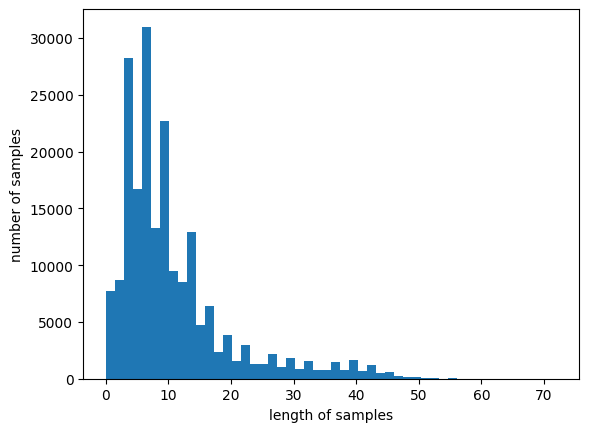

In [ ]:
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

네이버 영화 리뷰 텍스트를 학습한 word2vec

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)


In [ ]:
model.wv.vectors.shape

(16477, 100)

= 16,477개의 단어가 존재하며 각 단어가 100 차원의 실수로 이루어져있다.

In [ ]:
print(model.wv.most_similar("최민식"))

[('이정재', 0.8302770853042603), ('안성기', 0.8301197290420532), ('설경구', 0.8248011469841003), ('김명민', 0.8120423555374146), ('한석규', 0.8070085048675537), ('이민호', 0.7986372709274292), ('박중훈', 0.7967875003814697), ('오달수', 0.7890275120735168), ('최민수', 0.7889567017555237), ('박신양', 0.7861729860305786)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8802419304847717), ('슬래셔', 0.855026364326477), ('호러', 0.839767336845398), ('느와르', 0.8233957886695862), ('물의', 0.823029637336731), ('무비', 0.8135316967964172), ('블록버스터', 0.8016046285629272), ('블랙', 0.7955324649810791), ('정통', 0.7952302694320679), ('물', 0.7893420457839966)]


#임베딩 벡터의 시각화

embedding projector를 이용해 학습한 임베딩 벡터들을 시각화할 것이다.

시각화 하기 위해서는 모델을 tsv 파일로 만들어놔야 한다.

**명령어**
!python -m gensim.scripts.word2vec2tensor --input 모델이름 --output 모델이름



In [ ]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2024-03-05 05:11:54,247 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2024-03-05 05:11:54,247 - keyedvectors - INFO - loading projection weights from eng_w2v
2024-03-05 05:11:55,347 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-03-05T05:11:55.345442', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2024-03-05 05:11:56,345 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2024-03-05 05:11:56,345 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2024-03-05 05:11:56,346 - word2vec2tensor - INFO - finished running word2vec2tensor.py


#프로젝팅 하기

https://projector.tensorflow.org/

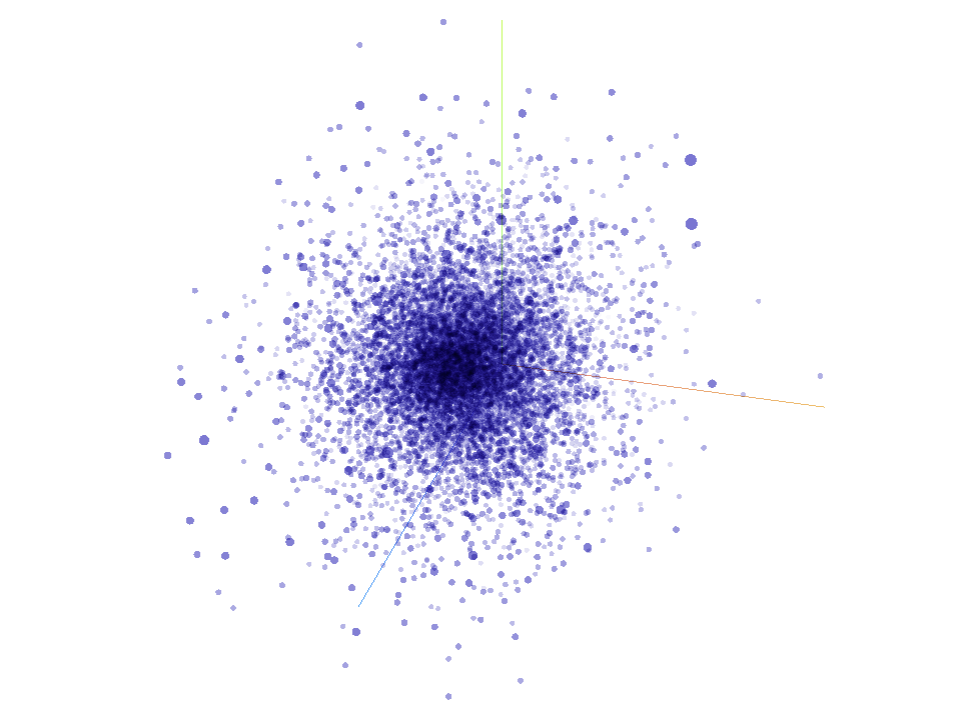